#1 Perkenalan
Nama: Hafidz Muta'ali

Batch: FTDS 006

Live Code 3

## 2 Problem
Kamu adalah seorang data scientist di salah satu perusahaan e-commerce. Saat ini, kamu terlibat dalam proyek bersama dengan tim produk dan tim UI/UX untuk merubah tampilan landing page. Menggunakan dataset dari https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/purchase_data.txt?token=AEZDEHRU5YLQEXGDDLCL6CLA2KZTI, menggunakan konsep central of tendency, apakah data cenderung berpusat pada purchased=0 atau purchased=1? dan buatlah analisa menggunakan konsep hypothesis testing dan A/B testing (Informasikan H0 dan H1 pada bagian Mathematical Calculation and Analysis). Apa kesimpulanmu terhadap hasil A/B testing?

* user_id = id pelanggan
* timestamp = Waktu ketika pelanggan mengakses laman web
* group = grup kontrol dan treatment
* landing_page = landing page yang diakses oleh pelanggan (laman lama atau laman baru)
* purchased = 0 : tidak ada pembelian, and 1: ada pembelian

##3 Import Pustaka

In [109]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##4 Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.
Data Processing

In [91]:
df = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/purchase_data.txt?token=AEZDEHRU5YLQEXGDDLCL6CLA2KZTI',delimiter=';')
df

,user_id,timestamp,group,landing_page,purchased
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


## 5 Data Preprocessing
## MEASURES OF TENDENCY DATA
Bagian ini berisi proses pengolahan data hingga siap dianalisa.

In [92]:
#Melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   purchased     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [93]:
#Melihat value unique pada kolom purchashed
df['purchased'].unique()

array([0, 1])

In [94]:
#Melihat value unique pada kolom group
df['group'].unique()

array(['control', 'treatment'], dtype=object)

In [95]:
#Melihat value unique pada kolom landing page
df['landing_page'].unique()

array(['old_page', 'new_page'], dtype=object)

In [96]:
#melihat statistik keseluruhan data
df.describe()

,user_id,purchased
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [97]:
df['purchased'].value_counts() #Menghitung value dari kolom purchashed

0    259241
1     35237
Name: purchased, dtype: int64

In [98]:
df['purchased'].mode() #Mencari nilai yang sering muncul pada kolom purchased

0    0
dtype: int64

In [99]:
df['purchased'].median() #mencari nilai tengah data purchased

0.0

In [100]:
df['purchased'].mean() #mencari rata rata pada kolomn purchased

0.11965919355605512

#6 Mathematical Calculation and Analysis
Bagian ini berisi perhitungan matematis dan analisa yang diperlukan seperti membuat grafik, dsb.


## Single Sample Hypothesis Testing
A/B Testing

**H0: μ_purchased = 0**

**H1: μ_purchased = 1**


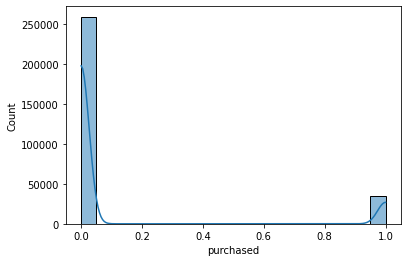

In [101]:
sns.histplot(df['purchased'],kde=True) #Kernel density estimation (KDE) 

In [126]:
beli = df['purchased']==1
tbeli = df['purchased']==0

print('rate of purchased 1:',beli.sum()/beli.count())
print(' rate of non purchased 0:',tbeli.sum()/tbeli.count())

rate of purchased 1: 0.11965919355605512
 rate of non purchased 0: 0.8803408064439449


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


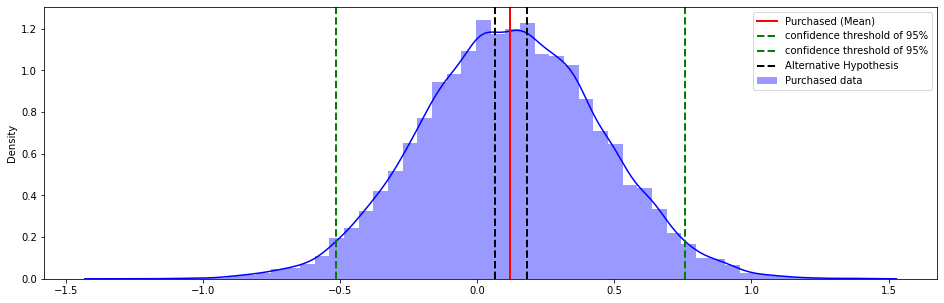

In [106]:
purchased = np.random.normal(df.purchased.mean(), df.purchased.std(), 15000)

ci = stats.norm.interval(0.95, df.purchased.mean(), df.purchased.std())

plt.figure(figsize=(16,5))
sns.distplot(purchased, label='Purchased data', color='blue')
plt.axvline(df.purchased.mean(), color='red', linewidth=2, label='Purchased (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(purchased.mean() + t_stat*purchased.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(purchased.mean() - t_stat*purchased.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

## Two Tailed Hypothesis Testing
A/B Testing

**H0: μ_control_group != μ_treatment_group**

**H1: μ_control_group = μ_treatment_group**

In [110]:
group_control = df[df['group']=='control']['purchased'].replace({True:1,False:0})
group_treatment = df[df['group']=='treatment']['purchased'].replace({True:1,False:0})

print('Purchased rate of group control:',group_control.sum()/group_control.count())
print('Purchased rate of group treatmeant:',group_treatment.sum()/group_treatment.count())

Purchased rate of group control: 0.12039917935897611
Purchased rate of group treatmeant: 0.11891957956489856


In [111]:
group_control

0         0
1         0
4         1
5         0
7         0
         ..
294471    0
294473    0
294474    0
294475    0
294476    0
Name: purchased, Length: 147202, dtype: int64

In [112]:
group_treatment

2         0
3         0
6         1
8         1
9         1
         ..
294462    0
294465    0
294468    0
294472    0
294477    0
Name: purchased, Length: 147276, dtype: int64

In [121]:
t_stat,p_val = stats.ttest_rel(group_control.sample(15000),group_treatment.sample(15000)) #we take 15000 sample of each data to make the size the same.
print('P-value:',p_val)


P-value: 0.7504970739182405


#7 Hasil

berdasarkan  analisa 

---


* berdasarkan MEASURES OF TENDENCY DATA dapat dipastikan bahwa data lebih berpusat pada purchased 0 dari pada purchased 1

* berdasarkan Single Sample Hypothesis Testing p_value yang dihasilkan kurang dari 0.05 sehingga bisa disimpulkan bahwa hipotesa 0 adalah benar karena value purchased terbanyak adalah 0

* berdasarkan Two Tailed Hypothesis Testing p_value yang dihasilkan lebih dari 0.05 sehingga bisa disimpulkan bahwa hipotesa 1 adalah benar